

>### Marketing Campaigns

>**Have a look at the data included in the marketing campaigns dataset and import it into a tool of your choice for analysis and visualization. The data contains weekly information about different online marketing campaigns in one market.**

>**a)  Give an overview of the development of the entire market and the different campaigns. Please prepare 3-5 charts and summarize the most important findings.**

>**b) How would you assess the development of the quality of traffic, e.g. in terms of revenue per visitor. How is the overall development and how does each campaign evolve?**

>**c)  You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:**

>**What is your advice in which campaign to invest and why?
How do you expect this to impact the overall performance in the market from week 31 onwards?**

## How should I start?

#### Gather data

As I have downloaded the csv file, I will firstly insert the file

#### Access and Clean data

Find whether this data set has some tidiness and quality issue,  if so I will need to do data wrangling before I start to analyze it, write and test the codes.

#### Analyze and Visualize

This is the main point of this task, to show my analytic skill. I will need to analyze what is happending in this data set, present some key findings. 
Visualization is one of the most important part of this task, finally we need to present our results in a simply and understandable way. Except some graphs will be showed in Python, I will also create a Dashboard in Tableau to make this data visualization like a story telling.

## Table of Contents
<ul>
<li><a href="#Gather-Data">Gather Data</a></li>
<li><a href="#Access-and-Clean-Data">Access and Clean Data</a></li>
<li><a href="#Analyze-and-Visualize">Analyze and Visualize</a></li>
    <li><a href="#The-relationship-between-the-campaigns-and-the-revenue-and-cost.">General Picture</a></li>
    <li><a href="#Performance-of-Aldebaran">Peformance of Aldebaran</a></li>
    <li><a href="#Performance-of-Bartledan">Peformance of Bartledan</a></li>
    <li><a href="#Performance-of-Cottington">Peformance of Cottington</a></li>
<li><a href="#Key-findings-and-Insights">Key findings and insights</a></li>
</ul>

<a id='Gather-Data'></a>
#### Gather Data

In [2]:
# Insert all the libraries I might need for coding, and insert the CSV file.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import datetime as dt

campaigns = pd.read_csv('marketing_campaigns.csv', sep=';')

<a id='access'></a>
#### Access and Clean Data

In [3]:
# Let's get a general picture of how this dataframe look like.
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost
0,1,Aldebaran,27,2.269511,3.763627
1,2,Aldebaran,64,10.820403,15.322613
2,3,Aldebaran,80,7.132998,10.753533
3,4,Aldebaran,93,11.085813,16.906191
4,5,Aldebaran,120,14.282481,21.446570


In [4]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
Week        91 non-null int64
Campaign    91 non-null object
Visits      91 non-null int64
Revenue     91 non-null float64
Cost        91 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


<font color=blue>That seems a small data frame, consists of 91 lows and 4 columns, the data types are correct, no missing value neither. The factors are Week, Campaign, Visits, Revenue and Cost.</font>

In [5]:
# Let me know what are the campaigns.
campaigns.Campaign.value_counts()

Cottington    31
Aldebaran     30
Bartledan     30
Name: Campaign, dtype: int64

<font color=blue> All right, now we see there are 3 campaigns, and these 3 campaigns have spent almost the equal time 30 weeks.</font>

In [6]:
# But I think there are some factors are missing, such as the revenue per visitor, gross profit, ROI.
campaigns['revenue per visitor'] = campaigns['Revenue']/campaigns['Visits']
campaigns['gross profit'] = campaigns['Revenue']-campaigns['Cost']
campaigns['ROI'] = campaigns['gross profit']/campaigns['Cost']

In [7]:
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost,revenue per visitor,gross profit,ROI
0,1,Aldebaran,27,2.269511,3.763627,0.084056,-1.494116,-0.396988
1,2,Aldebaran,64,10.820403,15.322613,0.169069,-4.502210,-0.293828
2,3,Aldebaran,80,7.132998,10.753533,0.089162,-3.620535,-0.336683
3,4,Aldebaran,93,11.085813,16.906191,0.119202,-5.820379,-0.344275
4,5,Aldebaran,120,14.282481,21.446570,0.119021,-7.164089,-0.334044


In [8]:
# But the decimal is too long, let me shorten it to see it more clear
campaigns=campaigns.round(decimals=2, out=None)

In [9]:
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost,revenue per visitor,gross profit,ROI
0,1,Aldebaran,27,2.27,3.76,0.08,-1.49,-0.40
1,2,Aldebaran,64,10.82,15.32,0.17,-4.50,-0.29
2,3,Aldebaran,80,7.13,10.75,0.09,-3.62,-0.34
3,4,Aldebaran,93,11.09,16.91,0.12,-5.82,-0.34
4,5,Aldebaran,120,14.28,21.45,0.12,-7.16,-0.33


In [10]:
# That is good we also look at the general numerical before we dive in.
campaigns.describe()

,Week,Visits,Revenue,Cost,revenue per visitor,gross profit,ROI
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,15.659341,213.802198,236.742527,241.536044,1.364286,-4.793736,-0.048681
std,8.787895,128.068317,133.992460,136.031315,0.934621,25.835467,0.131413
min,1.000000,27.000000,2.270000,3.760000,0.080000,-59.180000,-0.400000
25%,8.000000,144.000000,122.560000,128.520000,0.335000,-22.145000,-0.120000
50%,16.000000,158.000000,241.210000,235.320000,1.300000,-7.730000,-0.070000
75%,23.000000,233.000000,357.410000,348.420000,2.270000,17.185000,0.050000
max,30.000000,613.000000,463.250000,507.520000,2.910000,58.760000,0.250000


<font color=blue>But from here we can see some interesting numbers. The average cost is higher than Revenue, does it mean that is losing the profit? Can we predict that it will keep having negative profit in the future? We can think about these questions and analyze in the follows.</font>

<a id='Analyze-and-Visualize'></a>
#### Analyze and Visualize
<a id='The-relationship-between-the-campaigns-and-the-revenue-and-cost'></a>
### The relationship between the campaigns and the revenue and cost.

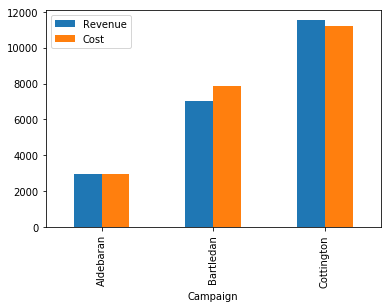

In [11]:
campaigns.groupby(['Campaign'])['Revenue','Cost'].sum().plot(kind='bar', label = 'The revenue and cost of the campaigns')
plt.legend()

<font color=blue> From this graph we can see that the revenue and the cost of each campaign. 
    
Is not difficult to tell that we have invested most in Cottington, but it also has the most revenue, the there are more revenue than cost in this case.
    
Aldebaran has the more or less the same revenue and cost.

But that is very clear Bartledan has the much more cost than revenue.</font>

### The relationship between the campaigns, visits, revenue per visitor and gross profit.

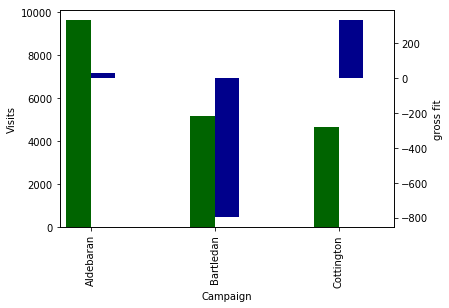

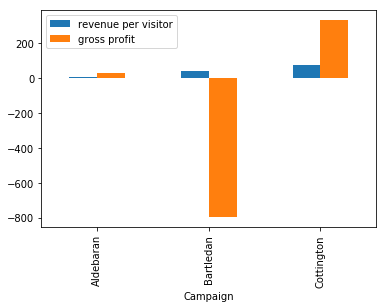

In [12]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

campaigns.groupby(['Campaign'])['Visits'].sum().plot(kind='bar', color='darkgreen', ax=ax, width=width, position=1)
campaigns.groupby(['Campaign'])['gross profit'].sum().plot(kind='bar', color='darkblue', ax=ax2, width=width, position=0)

ax.set_ylabel('Visits')
ax2.set_ylabel('gross fit')

plt.show()

campaigns.groupby(['Campaign'])['revenue per visitor','gross profit'].sum().plot(kind='bar', label = 'The revenue per visitor and gross profit of the campaigns')
plt.legend()

<font color=blue> That is curious to know what is the relationhip between revenue per visitor, visits and gross profit in each campaign.
    
Campaign Aldebaran has the most visits, but did not generate many revenue, so the revenue per visitor is quite low. But in general has gain some gross profit since we have invested least money into it.
    
Campaign Bartlendan has the second most visits but the gross profit is negative, the revenue generated per visitor is very few.

Campaign Cottington seems the best, has the most gross profit, has has generated most revenue per visitor, but we should also notice that the visits has brought is not good enough.</font>

### Let's dive the performance of each campaign.

In [13]:
# To see clear I will like to build 3 dataframes for each of these campaigns.
Aldebaran = campaigns[campaigns.Campaign == 'Aldebaran']
Cottington = campaigns[campaigns.Campaign == 'Cottington']
Bartledan = campaigns[campaigns.Campaign == 'Bartledan']

<a id='Performance-of-Aldebaran'></a>
### Performance of Aldebaran

#### Relationships

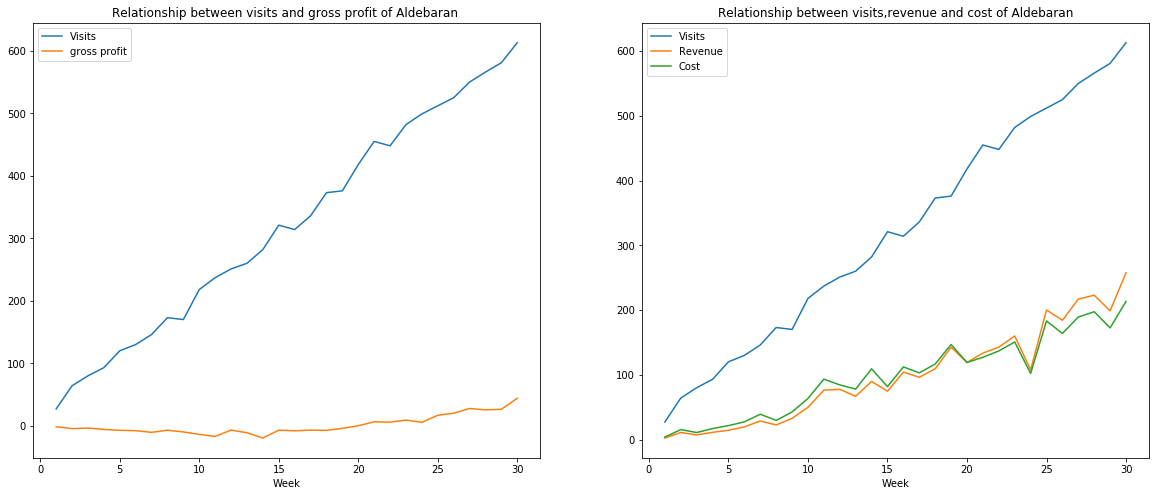

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Aldebaran.groupby(['Week'])['Visits','gross profit'].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Aldebaran ')
Aldebaran.groupby(['Week'])['Visits','Revenue','Cost'].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits,revenue and cost of Aldebaran')
plt.show()

<font color=blue> We can see the performance of campaign Aldebaran over theses 30 weeks, the visits are increasing over time, but the gross profi does not performance in a very positive way, from the week 0 to week 15, there was a negative tendency, since week 15-20, it started to increse slightly. We can also see from the second graph that the revenue started to cover the cost in the 20th week. </font>

#### Correlations

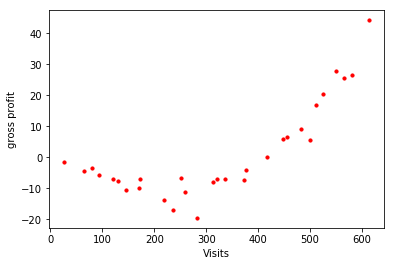

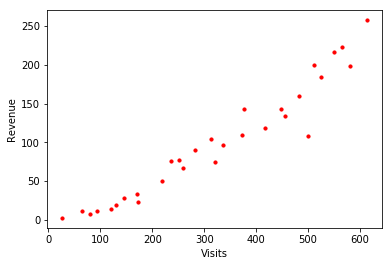

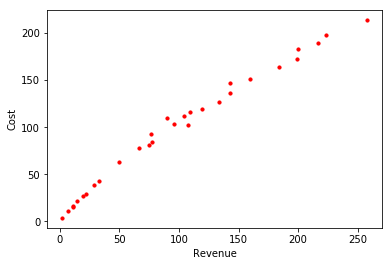

In [15]:
Aldebaran.plot.scatter('Visits', 'gross profit', s=10, c='red')
Aldebaran.plot.scatter('Visits', 'Revenue', s=10, c='red')
Aldebaran.plot.scatter('Revenue', 'Cost', s=10, c='red')

<font color=blue> Is you still cannot see clearly the relationship, we can see the correlation between visits and gross profit and revenue.</font>

<font color=blue>In general, the visit and gross profi have a positive and strong correlation, it means more visits more revenue. </font>

<font color=blue>From the correlation of cost and revenue we can see that, from 0-100 revenue we have invested heavily, but later the cost was investing slowly but we sill get the steadly grow of revenue.  </font>

<font color=blue> The correlation of visits and gross profit begins with negetive tendency, more visits brought less revenue, but later the tendency started to be positive when our visits are more than 300.</font>

#### Revenue per visitor VS ROI

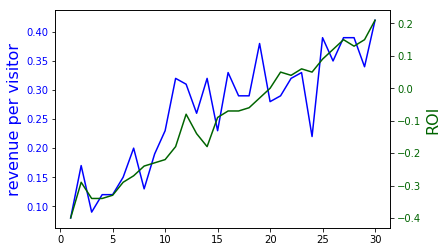

In [16]:
fig, ax1 = plt.subplots()
x = Aldebaran.groupby(['Week'])['revenue per visitor'].sum()
y = Aldebaran.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="blue")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

<font color=blue> Something we really should consider our ROI, people usually think more revenue we generated we will have more ROI, is not always right. We can consider firstly the relationship between revenue per visitor and our ROI.
In this graph you can see that the revenue per visitor has a general positive tendency, but in the week 3,7,15,17,20,24,26,29 had huge drop, we will think detailly what happenend in these weeks, revenue was not generated enough by each visitor. We might lost the visitor engagement in these weeks. Let's also see the ROI, the fluctuate of ROI is very diferent from revenue per visitor, they don't have a strong relationship.</font>

<a id='Performance-of-Bartledan'></a>
### Performance of Bartledan

#### Relationships

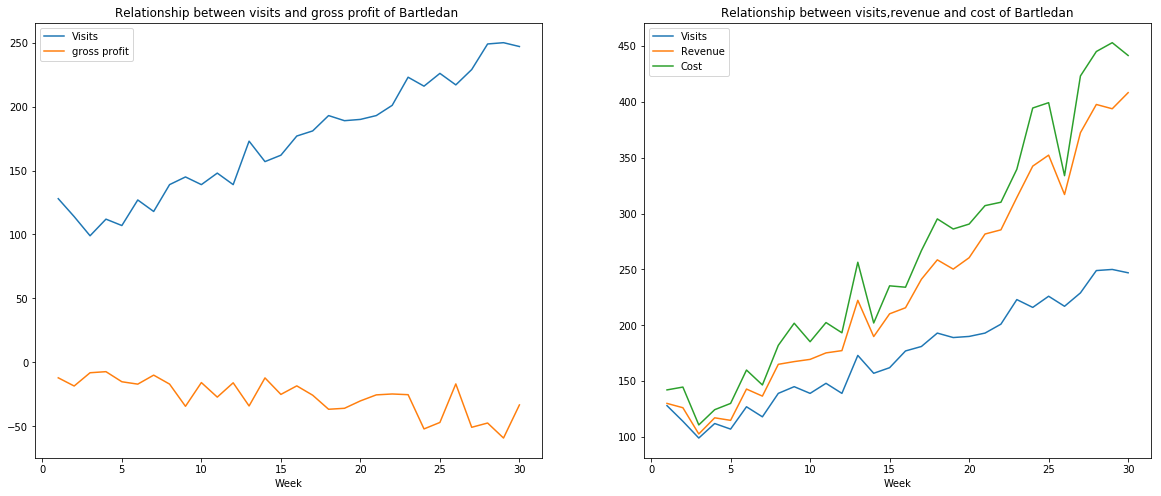

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Bartledan.groupby(['Week'])['Visits','gross profit'].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Bartledan ')
Bartledan.groupby(['Week'])['Visits','Revenue','Cost'].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits,revenue and cost of Bartledan')
plt.show()

<font color=blue> Obviously that the gross profit is dropping over time even though the visits increased steadily. From the second graph you can see the cost was always more than revenue and the heavy level of cost does not result as heavy increase of visits.</font>

#### Correlations

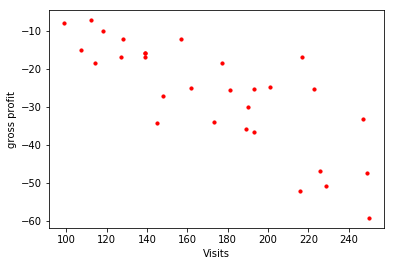

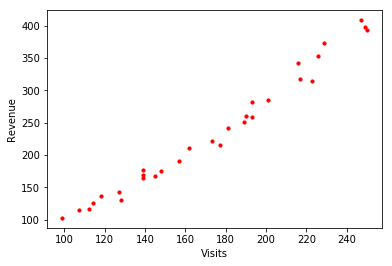

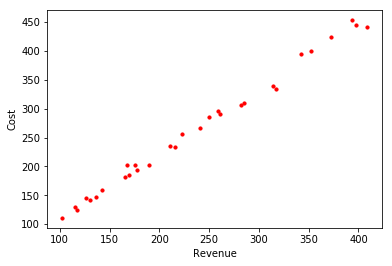

In [18]:
Bartledan.plot.scatter('Visits', 'gross profit', s=10, c='red')
Bartledan.plot.scatter('Visits', 'Revenue', s=10, c='red')
Bartledan.plot.scatter('Revenue', 'Cost', s=10, c='red')

<font color=blue>The correlation of visits and the gross profit is negative, means more visits less gross profit. Although the correlation of visits and revenue is positive, but we are not earning money. From the 3rd graph you can also see that the cost has been always invested very heavily and every week more or less the same amount of the investment, but the revenue never covers the cost.</font>

#### Revenue per visitor VS ROI

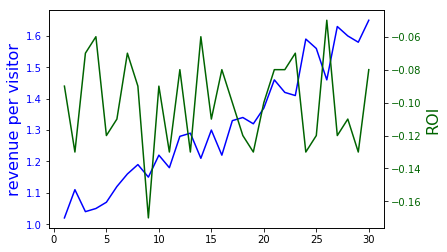

In [19]:
fig, ax1 = plt.subplots()
x = Bartledan.groupby(['Week'])['revenue per visitor'].sum()
y = Bartledan.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="blue")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

<font color=blue>The revenue per visitor has more a positive tendency, but within 20 weeks, there are 9 weeks the revenue per visitor drops. The ROI does not really have a tendency, is increasing and decreasing, difficult to tell how does it performance.</font>

<a id='performance-of-Cottington'></a>
### Performance of Cottington

#### Relationships

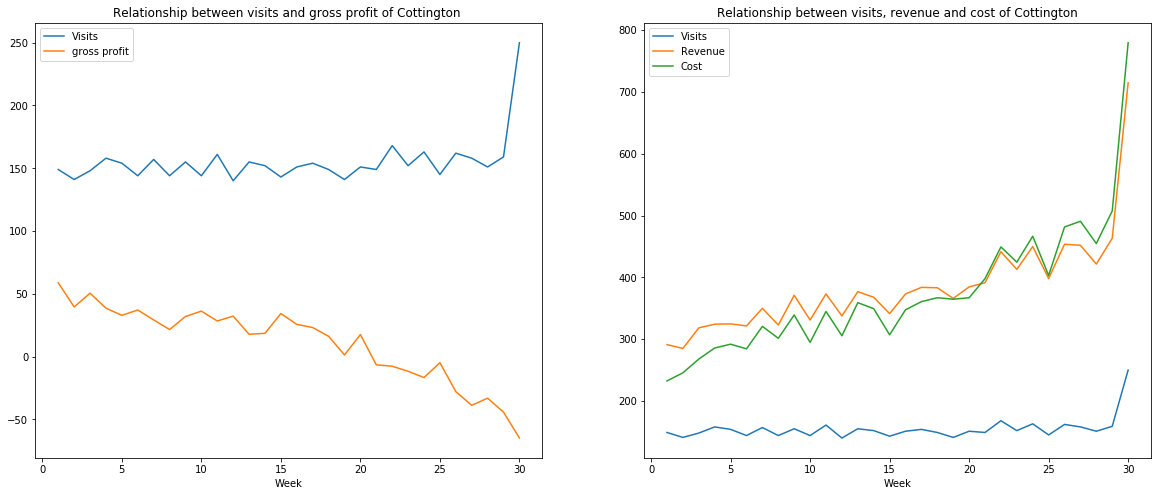

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Cottington.groupby(['Week'])['Visits','gross profit'].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Cottington ')
Cottington.groupby(['Week'])['Visits','Revenue','Cost'].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits, revenue and cost of Cottington')
plt.show()

<font color=blue>We can see from the 1st graph that the traffic in these 30 weeks does not really increase even though we are constantely invest the money on it, the campaign does not bring many visitors. Intead, the gross profit drops over the time. Because the cost is almost always more than the revenue.</font>

#### Correlations

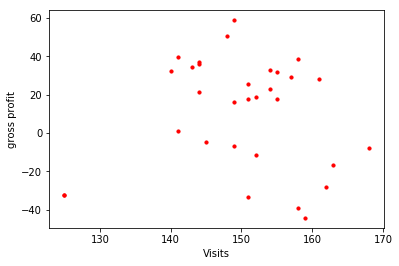

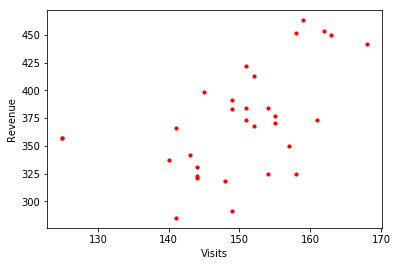

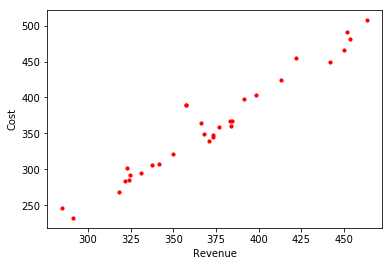

In [21]:
Cottington.plot.scatter('Visits', 'gross profit', s=10, c='red')
Cottington.plot.scatter('Visits', 'Revenue', s=10, c='red')
Cottington.plot.scatter('Revenue', 'Cost', s=10, c='red')

<font color=blue>The correlations between visits and gross profit is not very strong, it means the visits does not really affect much on the gross profit, but we still can see a negative correlation. The correlations between visits and revenue is not strong neither, again means the visits does not influence much on the revenue, but they still have a relatively negative correlation. From the 3rd correlation of cost and revenue, we can see that more cost spend more revenue gain, but we should notice that we are investing always more than we gain. </font>

#### Revenue per visitor and ROI

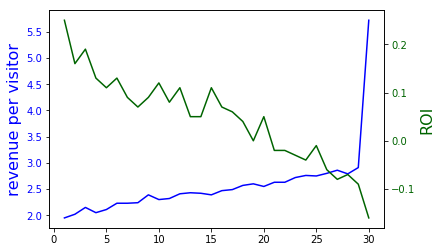

In [22]:
fig, ax1 = plt.subplots()
x = Cottington.groupby(['Week'])['revenue per visitor'].sum()
y = Cottington.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="blue")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

<font color=blue>That is clear revenue per visitor is increasing all the time, but as we have analyzed before, we know that the visits are not increasing along the time, revene increases is because cost increase. From ROI we can approve this again, ROI drops badly. </font>

<a id='Key-findings-and-Insights'></a>
## Key findings and Insights

#### Aldebaran
**Aldebaran has the best performance among the 3 campaigns.** It successfully attracted a lot of traffic, even though we see at the first 15 weeks the gross profit is not increasing, but since then the tendency is positive. More visits bring more profit. We also notice that, our amount of investment per week on this campaign is slight decreasing, but the revenue still keep increasing steadily. We can predict that if we keep investing on this campaign, it will bring more traffic and more profit.

#### Bartledan
**We are losing a lot of money on this campaign.** Although this campaigns has attracted a lot of traffic, but the revenue we gained from it cannot cover the investment, unfortunately we did not archive what we want to archive.

#### Cottington
From the first 3 graphs before we go deeper into the 3 campaigns, we can see that the campaign Cottington seems have the best performance, because it has the most revenue, most gross profit and best revenue per visitor. But from the further analysis you can see that **Cottington is not successful**, the investment does not bring more visits, neither bring more revenue, instead the cost is heavily increasing and always more than revenue, so it leads a bad performance on the gross profit, frankly speaking we will lose money.

#### Next Step
We should keep investing on Aldebaran, but we see there are 7 drops on revenue per visitor within 30 weeks, it warns us to have a deeper check what happened in these 7 weeks, find the reason which we did not engage the visitors. Since this campaign has brought a lot of traffic, to take advantage of it, I would suggest do some attractive offer or design on the web, try to converse them into our real customers.

I could suggest to stop investing on the Barledan and Cottington, because Barledan lets us lose money and Cottington does not peformance well as we expected.

### What I would suggest the responsible business developer.

**You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:
What is your advice in which campaign to invest and why?
How do you expect this to impact the overall performance in the market from week 31 onwards?**

I will definitely sugest the responsible business developer invest on Aldebaran campaign, we have analyzed that this campaign is the only one is gaining profit and attracts the traffic effiently, we can keep investing on it, the tendency is positive.
I expect this investment can bring more profit and increase the revenue per visitor, but still I will stress on that we need a build a more attractive website to help these traffic generated become our engaged customers.